In [1]:
from skimage import io, exposure, feature, color, transform, filters
from scipy import ndimage
import cv2

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

from utils import *

In [12]:
report_imgdir = "../../report/images/"

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "xelatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

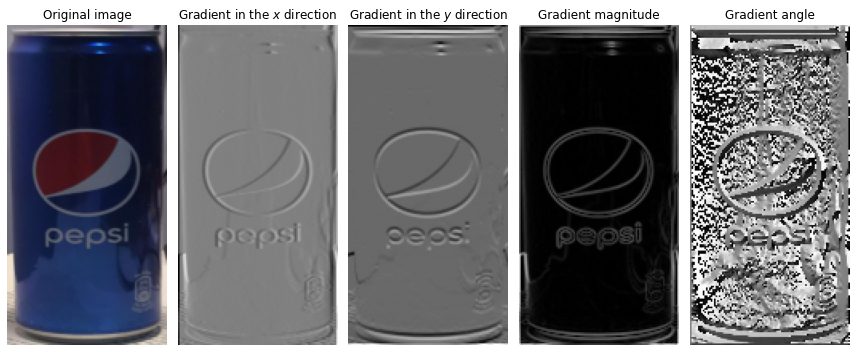

In [5]:
pepsi_model_img = "../../report/images/pepsi_model.jpeg"
detergent_model_img = "../../report/images/detergent_model.jpeg"
cocacola_model_img = "../../report/images/cocacola_model.jpeg"
image_shape = (200, 100)

image = io.imread(pepsi_model_img)
if len(image.shape) == 2: # it's already grayscale
    gray = image
elif image.shape[2] == 4:
    gray = color.rgb2gray(color.rgba2rgb(image))
elif image.shape[2] == 3:
    gray = color.rgb2gray(image)
# blur
# gray = filters.gaussian(gray, sigma=2)
# resize to a fixed size
gray = transform.resize(gray, image_shape)

# filter in X and Y
kx = np.array([[-1,0,1]])
ky = np.array([[-1],[0],[1]])

gradient_x = ndimage.convolve(gray, kx, mode='constant', cval=0.0)
gradient_y = ndimage.convolve(gray, ky, mode='constant', cval=0.0)
# gradient magnitude and direction ( in degrees )
mag, angle = cv2.cartToPolar(gradient_x, gradient_y, angleInDegrees=True)

# compute HOG
fd, hog_image = feature.hog(gray, visualize=True)

# Plot
fig, axs = plt.subplots(1, 5, figsize=(12, 5))
axs[0].imshow(transform.resize(image, image_shape))
axs[0].set_axis_off()
axs[0].set_title('Original image')

axs[1].imshow(gradient_x, cmap=cm.gray)
axs[1].set_axis_off()
axs[1].set_title('Gradient in the $x$ direction')

axs[2].imshow(gradient_y, cmap=cm.gray)
axs[2].set_axis_off()
axs[2].set_title('Gradient in the $y$ direction')

axs[3].imshow(mag, cmap=cm.gray)
axs[3].set_axis_off()
axs[3].set_title('Gradient magnitude')

axs[4].imshow(angle, cmap=cm.gray)
axs[4].set_axis_off()
axs[4].set_title('Gradient angle')

fig.tight_layout()
plt.show()
# plt.savefig(report_imgdir + "pepsi_gradients.pgf")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
<ipython-input-24-ac43b869abea>:25: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


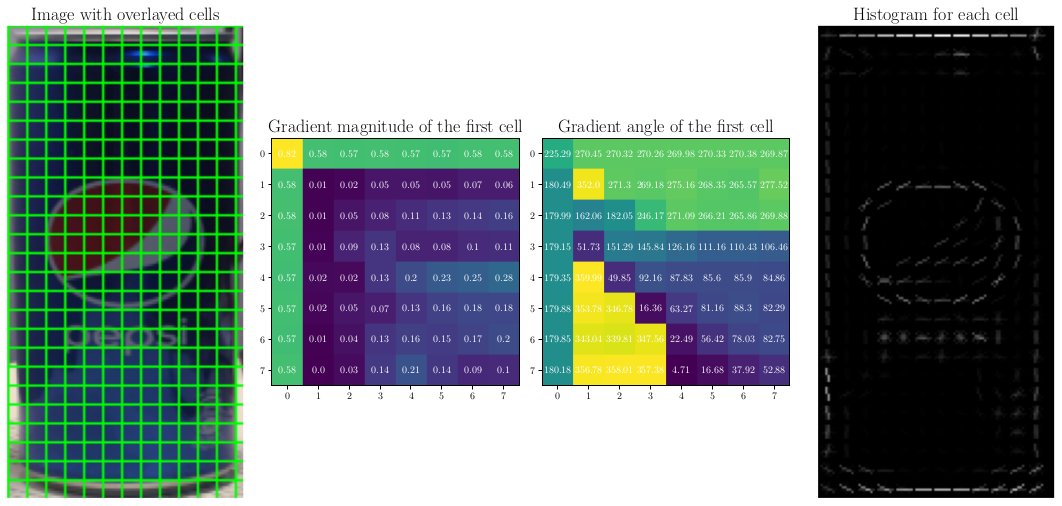

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(15, 7))

image_w_grid = transform.resize(image, image_shape)
pixels_per_cell = (8, 8)
image_w_grid[::pixels_per_cell[0], :, :] = [0, 255, 0]
image_w_grid[:, ::pixels_per_cell[1], :] = [0, 255, 0]

for i in range(pixels_per_cell[0]):
    for j in range(pixels_per_cell[1]):
        text = axs[1].text(j, i, round(mag[i, j], 2), ha="center", va="center", color="w")
        text = axs[2].text(j, i, round(angle[i, j], 2), ha="center", va="center", color="w")

# Plot
axs[0].imshow(image_w_grid)
axs[0].set_title("Image with overlayed cells", fontsize=18)
axs[0].set_axis_off()
axs[1].imshow(mag[:pixels_per_cell[0],:pixels_per_cell[1]])
axs[1].set_title("Gradient magnitude of the first cell", fontsize=18)
axs[2].imshow(angle[:pixels_per_cell[0],:pixels_per_cell[1]])
axs[2].set_title("Gradient angle of the first cell", fontsize=18)
axs[3].imshow(hog_image, cmap=cm.gray)
axs[3].set_title("Histogram for each cell", fontsize=18)
axs[3].set_axis_off()
fig.tight_layout()
plt.show()
plt.savefig(report_imgdir + "pepsi_cellinfo.pgf")

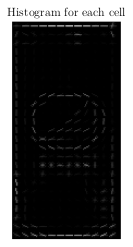

In [16]:
fig, ax = plt.subplots()
ax.imshow(hog_image, cmap=cm.gray)
ax.set_axis_off()
ax.set_title("Histogram for each cell")
plt.savefig(report_imgdir + "pepsi_histogram_per_cell.pgf")

0.001288684201426804 359.99932861328125


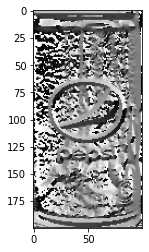

In [23]:
print(np.amin(angle), np.amax(angle))
plt.imshow(angle, cmap=cm.gray)
plt.show()

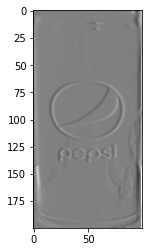

In [17]:
plt.imshow(gray_gradient_x, cmap=cm.gray)

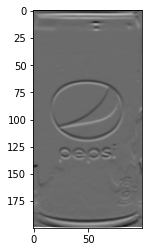

In [18]:
plt.imshow(gray_gradient_y, cmap=cm.gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


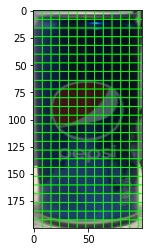

In [49]:
image_w_grid = transform.resize(image, image_shape)
pixels_per_cell = (8, 8)
image_w_grid[::pixels_per_cell[0], :, :] = [0, 255, 0]
image_w_grid[:, ::pixels_per_cell[1], :] = [0, 255, 0]

plt.imshow(image_w_grid)
plt.show()